<a href="https://colab.research.google.com/github/Abdelmounim1996/TDA/blob/main/TDA_s%C3%A9ance_III_Machine_Mapper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Master 2 Université Sorbonne Paris Nord -ED Galilée-

## TDA séances en machine

# TD3: TDA et Mapper



# Résumé de la séance II:

 1. Présentation des méthodes de vectorisation des diagrammes (Landascape) et insertion dans un classifieur 
    random forest par exemple. 
 2. TDA et série temporel: plongement de Taken (application: classification de série temporel), Betti curves.
 3. Exercice. Compté le nombre de trous et de composantes connexes en fonction du contraste. On pris une image 
    en niveau de gris (shapes fichier). On la a regardée comme une matrice NxM dont les coefficients sont entiers 
    entre 0 et 786, on a construit l'espace topologique filtré en filtrant sur le niveaux de gris puis 
    on avons calculé l'homologie persistante de $H_{0}$ et $H_{1}$. Nous avions construit un petit classifieur 
    (persistence entropy). 


# Mapper

In [ ]:
pip install -U giotto-tda

In [4]:
# Data wrangling
import numpy as np
import pandas as pd  # Not a requirement of giotto-tda, but is compatible with the gtda.mapper module

# Data viz
from gtda.plotting import plot_point_cloud

# TDA magic
from gtda.mapper import (
    CubicalCover,
    make_mapper_pipeline,
    Projection,
    plot_static_mapper_graph,
    plot_interactive_mapper_graph
)

# ML tools
from sklearn import datasets
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# The Mapper algorithm
Let's consider an -dimensional point cloud, i.e. a dataset with  numerical features. The Mapper algorithm follows three main steps:

Filtering: map each data point  to a low dimensional space  through a filter function 
Covering: cover the mapped values  with overlapping intervals.
Clustering: for each interval, calculate the pre-image  and apply a clustering algorithm on the set of points belonging to each pre-image.
The topological graph is then composed of:

nodes: clusters
edges: non-empty intersections between clusters
Even if its formulation could seem a bit intimidating, the best way to intuitively understand how the Mapper algorithm works is to use it and "play" with its parameters. The API of giotto-tda is scikit-learn compatible and provides a very convenient way to fit the Mapper through a pipeline object.

We will apply the Mapper algorithm to the following example. Our goal is to get a minimal graph which preserves the topological properties of the original figure.



![title](gtda_mapper.png)

# Le DBSCAN 

C'est un algorithme non supervisé très connu en matière de Clustering. Il a été proposé 1996 par Martin Ester, Hans-Peter Kriegel, Jörg Sander et Xiawei Xu. 


# Le principe 

Étant donnés des points et un entier k, l’algorithme vise à diviser les points en k groupes, appelés clusters, homogènes et compacts.

Le DBSCAN est un algorithme simple qui définit des clusters en utilisant l’estimation de la densité locale. On peut le diviser en 4 étapes : 

a. Pour chaque observation on regarde le nombre de points à au plus une distance ε de celle-ci. On appelle cette zone le ε-voisinage de l’observation.

b. Si une observation compte au moins un certain nombre de voisins y compris elle-même, elle est considérée comme une observation cœur. On a alors décelé une observation à haute densité.

c. Toutes les observations au voisinage d’une observation cœur appartiennent au même cluster. Il peut y avoir des observations cœur proche les unes des autres. Par conséquent de proche en proche on obtient une longue séquence d’observations cœur qui constitue un unique cluster. 

d. Toute observation qui n’est pas une observation cœur et qui ne comporte pas d’observation cœur dans son voisinage est considérée comme une anomalie. 

Reste maintenant à savoir comment choisir le bon epsilon:

Une méthode simple pour optimiser le ε consiste à regarder pour chaque observation à quelle distance se situe son voisin le plus proche. Ensuite il suffit de fixer un ε tel qu’une part « suffisamment grande » des observations aient une distance à son plus proche voisin inférieure à ε. Par « suffisamment grande » on entend 90-95% des observations qui doivent avoir au moins un voisin dans leur ε-voisinage.


Se rendre vers https://datascientest.com/machine-learning-clustering-dbscan pour plus de détails.

In [ ]:
!git clone https://github.com/giotto-ai/giotto-tda

In [22]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [23]:
import os
import sys

sys.path.append("/content/giotto-tda/examples/data")

In [29]:
from generate_datasets import * 

In [30]:
point_clouds_basic, labels_basic = make_point_clouds(n_samples_per_shape=10, n_points=20, noise=0.05)
point_clouds_basic.shape, labels_basic.shape

((30, 400, 3), (30,))

In [31]:
plot_point_cloud(point_clouds_basic[-1])

In [32]:
# tda magic
from gtda.mapper.filter import Projection
from gtda.mapper.cover import (
    OneDimensionalCover, 
    CubicalCover
)


![title](2D_projection.png)

In [33]:
# Define filter function - can be any scikit-learn transformer
filter_func = Projection(columns=[0, 2])
# Define cover
cover = CubicalCover(n_intervals=8, overlap_frac=0.5)
# Choose clustering algorithm - default is DBSCAN
clusterer = DBSCAN()

# Configure parallelism of clustering step
n_jobs = 1

# Initialise pipeline
pipe = make_mapper_pipeline(
    filter_func=filter_func,
    cover=cover,
    clusterer=clusterer,
    verbose=False,
    n_jobs=n_jobs,
)


In [35]:
data =point_clouds_basic[-1]
fig = plot_static_mapper_graph(pipe, data)
fig.show(config={'scrollZoom': True})

![title](height_filter.png)

In [36]:
# configure Mapper pipeline
pipeline = make_mapper_pipeline(
    filter_func=Projection(columns=2),
    cover=OneDimensionalCover(n_intervals=8, overlap_frac=0.5),
    clusterer=DBSCAN(),
)

In [37]:
figh = plot_static_mapper_graph(pipeline, data)
figh.show(config={'scrollZoom': True})

In [38]:
# configure Mapper pipeline
pipeline2 = make_mapper_pipeline(
    filter_func=Projection(columns=1),
    cover=OneDimensionalCover(n_intervals=10, overlap_frac=0.5),
    clusterer=DBSCAN(),
)

In [39]:
fig1d = plot_static_mapper_graph(pipeline2, data)
fig1d.show(config={'scrollZoom': True})

In [42]:
pip install anndata2ri

In [40]:
import rpy2.rinterface_lib.callbacks
import logging

In [43]:
from rpy2.robjects import pandas2ri
import anndata2ri

In [44]:
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)

In [45]:
pandas2ri.activate()
anndata2ri.activate()
%load_ext rpy2.ipython

In [98]:
%%R 
install.packages("TDAmapper")

In [99]:
%%R
library(TDAmapper)
library(ggplot2)

In [100]:
E1 = point_clouds_basic[-1]

In [101]:
E1[:,0]

array([ 3.02069408e+00,  2.53044648e+00,  1.59209274e+00,  1.00088028e+00,
        1.33328571e+00,  2.28207795e+00,  2.95739071e+00,  2.73779314e+00,
        1.85410210e+00,  1.06780506e+00,  1.16649164e+00,  2.01273137e+00,
        2.83020655e+00,  2.88545380e+00,  2.12534168e+00,  1.23324187e+00,
        1.05211522e+00,  1.71026781e+00,  2.68132145e+00,  2.97207616e+00,
        1.60805835e+00,  1.35236489e+00,  8.48309132e-01,  5.53471538e-01,
        7.50592947e-01,  1.21901054e+00,  1.59103235e+00,  1.47488759e+00,
        1.01235615e+00,  6.04400623e-01,  6.16541310e-01,  1.06453053e+00,
        1.53125064e+00,  1.57128650e+00,  1.16280934e+00,  6.59698955e-01,
        5.84676211e-01,  9.12785448e-01,  1.45498625e+00,  1.59357796e+00,
       -1.24897583e+00, -1.04051255e+00, -6.75511288e-01, -4.08993232e-01,
       -5.44380461e-01, -9.72896638e-01, -1.22163489e+00, -1.16147700e+00,
       -7.48883148e-01, -4.59672737e-01, -4.73147574e-01, -8.12379623e-01,
       -1.19601793e+00, -

In [102]:
%%R -i E1
E1.dist = dist(E1)

In [103]:
%%R
help(TDAmapper)

No documentation for ‘TDAmapper’ in specified packages and libraries:
you could try ‘??TDAmapper’


In [104]:
!git clone https://github.com/paultpearson/TDAmapper

fatal: destination path 'TDAmapper' already exists and is not an empty directory.


In [66]:
import sys
sys.path.append('/content/TDAmapper/R')

In [110]:
%%R
if(!exists("mapper.R", mode="function")) source("/content/TDAmapper/R/mapper.R")
if(!exists("lsmi_from_lsfi.R", mode="function")) source("/content/TDAmapper/R/lsmi_from_lsfi.R")
if(!exists("lsfi_from_lsmi.R", mode="function")) source("/content/TDAmapper/R/lsfi_from_lsmi.R")


In [111]:
%%R
library(TDAmapper)

In [113]:
%%R
# mapper
E1.mapper <- mapper(dist_object = E1.dist,
           filter_values = E1[,1], #1D projection
           num_intervals = 10,
           percent_overlap = 50,
           num_bins_when_clustering = 10)

In [114]:
%%R
E1.mapper

$adjacency
      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12]
 [1,]    0    1    0    0    0    0    0    0    0     0     0     0
 [2,]    1    0    1    0    0    0    0    0    0     0     0     0
 [3,]    0    1    0    1    0    0    0    0    0     0     0     0
 [4,]    0    0    1    0    1    1    0    0    0     0     0     0
 [5,]    0    0    0    1    0    0    1    1    0     0     0     0
 [6,]    0    0    0    1    0    0    1    1    0     0     0     0
 [7,]    0    0    0    0    1    1    0    0    1     0     0     0
 [8,]    0    0    0    0    1    1    0    0    1     0     0     0
 [9,]    0    0    0    0    0    0    1    1    0     1     0     0
[10,]    0    0    0    0    0    0    0    0    1     0     1     0
[11,]    0    0    0    0    0    0    0    0    0     1     0     1
[12,]    0    0    0    0    0    0    0    0    0     0     1     0

$num_vertices
[1] 12

$level_of_vertex
 [1]  1  2  3  4  5  5  6  6  7  8  9 10

$points_in

## Plot the mapper graph

In [117]:
%%R 
install.packages("igraph")

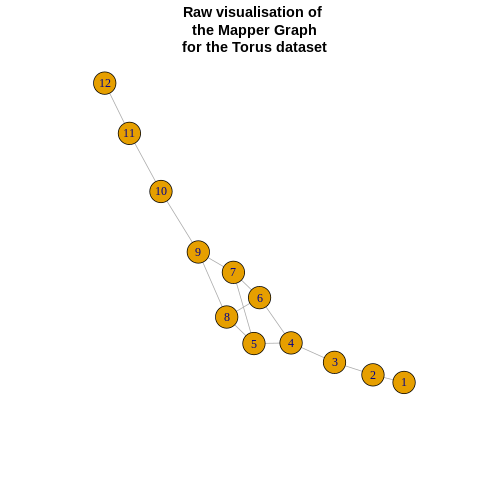

In [119]:
%%R
library(igraph)
E1.graph <- graph.adjacency(E1.mapper$adjacency, mode="undirected")
plot(E1.graph, layout = layout.auto(E1.graph), main="Raw visualisation of \n the Mapper Graph \nfor the Torus dataset" )

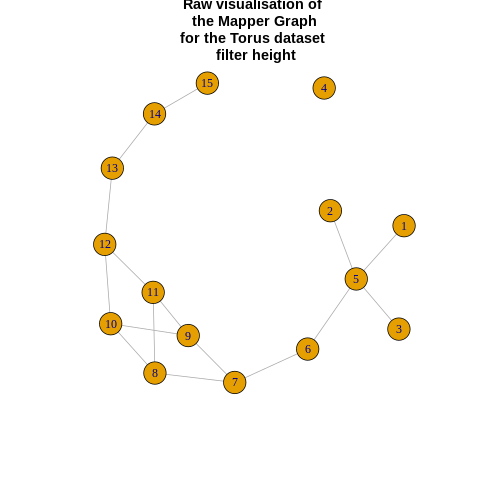

In [120]:
%%R
E1.mapper2 <- mapper(
           dist_object = E1.dist,
           filter_values = E1[,2], #height filter 
           num_intervals = 10,
           percent_overlap = 50,
           num_bins_when_clustering = 10)
E1.graph2 <- graph.adjacency(E1.mapper2$adjacency,mode="undirected")
plot(E1.graph2,
     layout = layout.auto(E1.graph2),
     main ="Raw visualisation of \n the Mapper Graph \nfor the Torus dataset \n filter height" )


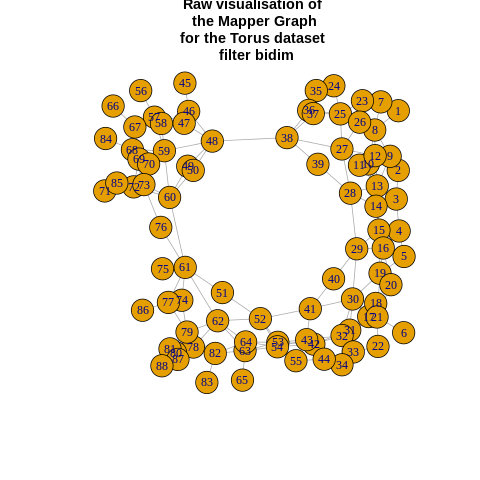

In [121]:
%%R
E1.mapper3 <- mapper(
           dist_object = E1.dist,
           filter_values = list(E1[,1], E1[,2]), 
           num_intervals = c(8,8),
           percent_overlap = 50,
           num_bins_when_clustering = 10)
E1.graph3 <- graph.adjacency(E1.mapper3$adjacency,mode="undirected")
plot(E1.graph3,
     layout = layout.auto(E1.graph3),
     main ="Raw visualisation of \n the Mapper Graph \nfor the Torus dataset \n filter bidim" )


## Exercice 1.

On applique le mapper avec la fonction hauteur mais en jouant avec les autres paramètres de l'algo et on compare avec le résultat théorique. 

## Exercice 2.

Même chose avec une strucutre qui a plusieurs boucles genre noeud de trèfles.

## Exercice 3. 

Répeter l'exemple, mais en utilisant gtda.mapper or kmapper

## Vrai données: Reaven and Miller diabetes data
About the data: 145 patients who had diabetes, a family history of diabetes, who wanted a physical examination, or to participate in a scientific study participated in the study. For each patient:

rw: relative weight

fpg: fasting plasma glucose,

ga : area under the plasma glucose curve for the three hour glucose tolerance test (OGTT)

ina area under the plasma insulin curve for the (OGTT)

aapg: steady state plasma glucose response.

cc: diabete category

The original study noted that the data set consisted of a central core, and two ``flares" emanating from it. The patients in each of the flares were regarded as suffering from essentially different diseases, which correspond to the division of diabetes into the adult onset and juvenile onset forms. One way in which we wish to use Mapper is as an automatic tool for detecting such flares in the data, even in situations where projections into two or three dimensional.

In [123]:
%%R
install.packages("locfit")
#BiocManager::install("locfit")
library(locfit)

In [124]:
%%R
data(chemdiab)
summary(chemdiab)

       rw              fpg            ga              ina       
 Min.   :0.7100   Min.   : 70   Min.   : 269.0   Min.   : 10.0  
 1st Qu.:0.8800   1st Qu.: 90   1st Qu.: 352.0   1st Qu.:118.0  
 Median :0.9800   Median : 97   Median : 413.0   Median :156.0  
 Mean   :0.9773   Mean   :122   Mean   : 543.6   Mean   :186.1  
 3rd Qu.:1.0800   3rd Qu.:112   3rd Qu.: 558.0   3rd Qu.:221.0  
 Max.   :1.2000   Max.   :353   Max.   :1568.0   Max.   :748.0  
      sspg                       cc    
 Min.   : 29.0   Chemical_Diabetic:36  
 1st Qu.:100.0   Normal           :76  
 Median :159.0   Overt_Diabetic   :33  
 Mean   :184.2                         
 3rd Qu.:257.0                         
 Max.   :480.0                         


In [126]:
%%R
install.packages("ks")
normdiab <- chemdiab
normdiab[,1:5] <- scale(normdiab[,1:5],center=FALSE)
normdiab.dist = dist(normdiab[,1:5])
library(ks)

In [127]:
%%R 
filter.kde <- kde(normdiab[,1:5],H=diag(1,nrow = 5),eval.points = normdiab[,1:5])$estimate

In [128]:
%%R
help(kde)

File: /tmp/RtmpzR2Sqv/Rtxt3857f9284d
kde                     package:ks                     R Documentation



_K_e_r_n_e_l _d_e_n_s_i_t_y _e_s_t_i_m_a_t_e



_D_e_s_c_r_i_p_t_i_o_n:



     Kernel density estimate for 1- to 6-dimensional data.



_U_s_a_g_e:



     kde(x, H, h, gridsize, gridtype, xmin, xmax, supp=3.7, eval.points, binned, 

         bgridsize, positive=FALSE, adj.positive, w, compute.cont=TRUE, 

         approx.cont=TRUE, unit.interval=FALSE, verbose=FALSE)

     

     ## S3 method for class 'kde'

     predict(object, ..., x, zero.flag=TRUE)

     

_A_r_g_u_m_e_n_t_s:



       x: matrix of data values



     H,h: bandwidth matrix/scalar bandwidth. If these are missing,

          ‘Hpi’ or ‘hpi’ is called by default.



gridsize: vector of number of grid points



gridtype: not yet implemented



xmin,xmax: vector of minimum/maximum values for grid



    supp: effective support for standard normal



eval.points: v

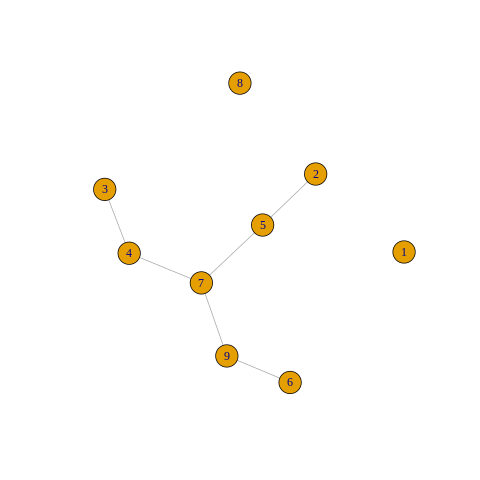

In [129]:
%%R
diab.mapper <- mapper(
           dist_object = normdiab.dist,
           filter_values = filter.kde,
           num_intervals = 4,
           percent_overlap = 50,
           num_bins_when_clustering = 20)
diab.graph <- graph.adjacency(diab.mapper$adjacency, mode="undirected")
plot(diab.graph )

In [130]:
%%R
#number of vertices
l = length(V(diab.graph))

In [131]:
%%R
Mode <- function(x) {
  ux <- unique(x)
  ux[which.max(tabulate(match(x, ux)))]
}

In [132]:
%%R
#Distribution of the cc variable in each vertex Majority vote

cc.maj.vertex <- c()
filter.kde.vertex <- c()
for (i in 1:l){
  points.in.vertex <- diab.mapper$points_in_vertex[[i]]
  Mode.in.vertex <- Mode(normdiab$cc[points.in.vertex])
  cc.maj.vertex <- c(cc.maj.vertex,as.character(Mode.in.vertex))
  filter.kde.vertex <- c(filter.kde.vertex,mean(filter.kde[points.in.vertex]))
}

In [133]:
%%R
#vertex taille
vertex.size <- rep(0,l)
for (i in 1:l){
  points.in.vertex <- diab.mapper$points_in_vertex[[i]]
  vertex.size[i] <- length((diab.mapper$points_in_vertex[[i]]))
}

In [136]:
%%R
if(!exists("mapperVertices.R", mode="function")) source("/content/TDAmapper/R/mapperVertices.R")
if(!exists("mapperEdges.R", mode="function")) source("/content/TDAmapper/R/mapperEdges.R")


MapperNodes <- mapperVertices(diab.mapper, 1:nrow(normdiab) )
MapperNodes$cc.maj.vertex <- as.factor(cc.maj.vertex)
MapperNodes$filter.kde <- filter.kde.vertex
MapperNodes$Nodesize <- vertex.size
MapperLinks <- mapperEdges(diab.mapper)


In [138]:
%%R
install.packages("networkD3")
library(networkD3)
forceNetwork(Nodes = MapperNodes, Links = MapperLinks, 
            Source = "Linksource", Target = "Linktarget",
            Value = "Linkvalue", NodeID = "Nodename",
            Group = "cc.maj.vertex", opacity = 1, 
            linkDistance = 10, charge = -400,legend = TRUE,
            Nodesize = "Nodesize")

# En Kmapper (python)

python -m install kmapper

In [139]:
%%R
normdiab[,1:5]
write.csv(normdiab[,1:5],"normdiab.csv",quote=F,row.names=F)

In [ ]:
!pip install kmapper

In [149]:
# Import the class
#import kmapper as km
import kmapper as km
from sklearn.neighbors import KernelDensity 

# ouvrir les données
normdiab = pd.read_csv('./normdiab.csv')
data = np.array(normdiab)

# Initialize
mapper = km.KeplerMapper(verbose=1)

# Fit to and transform the data
kde = KernelDensity(kernel='gaussian', bandwidth=1).fit(data)
log_density = kde.score_samples(data)
projected_data = mapper.fit_transform(data, projection=kde) # kde kernel

# Create dictionary called 'graph' with nodes, edges and meta-information (complex simplicial)
graph = mapper.map(projected_data, data, cover=km.Cover(n_cubes=4, perc_overlap=0.5))

# Visualize it
mapper.visualize(graph, path_html="diabetes_kde_4c_output.html",
                 title="diabetes_dataset_kmapper_kde_4c_filter")

#jupyter.display(path_html="diabetes_kde_output.html")

KeplerMapper(verbose=1)
..Composing projection pipeline of length 1:
	Projections: KernelDensity(bandwidth=1)
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (145, 5)

..Projecting data using: 
	KernelDensity(bandwidth=1)


..Scaling with: MinMaxScaler()

Mapping on data shaped (145, 5) using lens shaped (145, 5)

Creating 1024 hypercubes.

Created 2400 edges and 144 nodes in 0:00:00.138368.
Wrote visualization to: diabetes_kde_4c_output.html


'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>diabetes_dataset_kmapper_kde_4c_filter | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  width:  85px;\n  height: 85px;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#header {\n  background: #111111;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transform: uppercase;\n}\n\nh4 {\n  font-

In [150]:
help(mapper.fit_transform)

Help on method fit_transform in module kmapper.kmapper:

fit_transform(X, projection='sum', scaler='default:MinMaxScaler', distance_matrix=False) method of kmapper.kmapper.KeplerMapper instance
    Same as .project() but accepts lists for arguments so you can chain.
    
    Examples
    --------
    >>> # Stack / chain projections. You could do this manually,
    >>> # or pipeline with `.fit_transform()`. Works the same as `.project()`,
    >>> # but accepts lists. f(raw text) -> f(tfidf) -> f(isomap 100d) -> f(umap 2d)
    >>> projected_X = mapper.fit_transform(
    >>>     X,
    >>>     projections=[TfidfVectorizer(analyzer="char",
    >>>                                  ngram_range=(1,6),
    >>>                                  max_df=0.93,
    >>>                                  min_df=0.03),
    >>>                  manifold.Isomap(n_components=100,
    >>>                                  n_jobs=-1),
    >>>                  umap.UMAP(n_components=2,
    >>>                 

In [151]:
help(KernelDensity)

Help on class KernelDensity in module sklearn.neighbors._kde:

class KernelDensity(sklearn.base.BaseEstimator)
 |  KernelDensity(*, bandwidth=1.0, algorithm='auto', kernel='gaussian', metric='euclidean', atol=0, rtol=0, breadth_first=True, leaf_size=40, metric_params=None)
 |  
 |  Kernel Density Estimation.
 |  
 |  Read more in the :ref:`User Guide <kernel_density>`.
 |  
 |  Parameters
 |  ----------
 |  bandwidth : float, default=1.0
 |      The bandwidth of the kernel.
 |  
 |  algorithm : {'kd_tree', 'ball_tree', 'auto'}, default='auto'
 |      The tree algorithm to use.
 |  
 |  kernel : {'gaussian', 'tophat', 'epanechnikov', 'exponential', 'linear',                  'cosine'}, default='gaussian'
 |      The kernel to use.
 |  
 |  metric : str, default='euclidean'
 |      The distance metric to use.  Note that not all metrics are
 |      valid with all algorithms.  Refer to the documentation of
 |      :class:`BallTree` and :class:`KDTree` for a description of
 |      available